<a href="https://colab.research.google.com/github/tirals88/Alone-ML-DL/blob/main/2%EC%9E%A5_2%EC%A0%88%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'혼자 공부하는 머신러닝 + 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/rickiepark/hg-mldl'

**혼자 공부하는 머신러닝+딥러닝**

https://hanbit.co.kr/store/books/look.php?p_code=B2002963743

01 ~ 06 머신러닝 파트  
07 ~ 09 딥러닝 파트

# 02-2 데이터 전처리


이전의 데이터 처리는 **파이썬 리스트**를 사용하였지만, **넘파이**로 더 빠르고 효율적으로 처리할 수 있다.



```
np.column_stack(list_lists)
np.column_stack(([1,2,3],[4,5,6]))

>>> array([[1, 4],
           [2, 5],
           [3, 6]])

np.concatenate(list_lists)
np.concatenate(([1,2,3],[4,5,6]))

>>> array([[1, 2, 3, 4, 5, 6])
```



In [1]:
# 01-3 의 데이터 준비
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# zip() 함수와 리스트 내포 구문을 사용해 2차원 리스트 생성

fish_data = [[l, w] for l, w in zip(length, weight)]

# 정답 데이터 준비
# 도미 = 1, 빙어 = 0 으로 설정

fish_target = [1] * 35 + [0] * 14

In [2]:
# numpy 로 전처리
import numpy as np

fish_data = np.column_stack((length, weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
# np.ones
# np.zeros

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


이전 절에서는 훈련 세트와 테스트 세트를 직접 나누었다. 지금은 사이킷런의 함수 **train_test_split()**를 이용하여 나눌 것이다.

이 함수는 전달되는 리스트나 배열을 섞어준 뒤 비율에 맞게 훈련 세트와 테스트 세트로 나누어 준다.



In [8]:
# train_test_split()
# 사이킷런의 model_selection 모듈 아래 있으며 다음과 같이 import 할 수 있다.

from sklearn.model_selection import train_test_split

# 사용법

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state = 42)

fish_data 와 fish_target 2개의 배열을 전달했으므로, 2개씩 나뉘어 총 4개의 배열이 반환된다.

차례대로 처음 2개는 입력데이터(train_input, test_input), 나머지 2개는 타깃 데이터(train_target, test_target)이다.

랜덤 시드는 42로 설정하였다.

또한 기본적으로 25%를 테스트 세트로 떼어 낸다.

In [11]:
# 잘 되었는지 numpy의 shape 속성을 통해 확인

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


위 데이터를 보면 잘 섞인 것 같지만 빙어의 비율이 조금 모자란다. 편향이 조금 있고 이처럼 무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않을 수 있다.

특히 데이터의 개수가 적을 때 이런 일이 생기기 쉽다.

train_test_split() 함수는 이런 문제를 간단히 해결 할 수 있다. 

stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다.

```
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state = 42)
```



In [14]:
# stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다.
# 위에서 말했듯 데이터의 개수가 적을 때 특히 유용하다.

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state = 42)

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
# k-최근접 이웃 훈련

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [20]:
# 25cm, 150g 의 도미 판별

print(kn.predict([[25, 150]]))

print(kn.score([[25, 150]], [1])) # score 함수와 predict 함수 차이

[0.]
0.0


도미의 feature가 25cm 와 150g 으로 주어지자 빙어라고 예측

문제점을 파악하기 위해 **산점도**로 표현

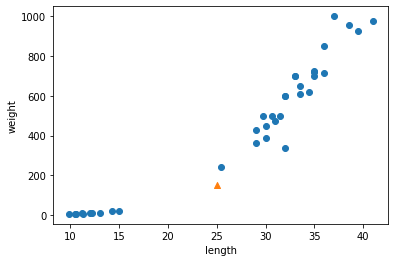

In [21]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이 샘플은 분명히 다른 도미 데이터에 더 가깝다.

그렇다면 왜 빙어 데이터에 가깝다고 판단한 것일까?

k-최근접 이웃은 주변의 샘플 중 다수인 클래스를 예측으로 사용한다.

KNeighborsClassifer 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() 메서드를 제공한다.

KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5 이므로 5개의 이웃이 반환된다.

In [24]:
distances, indexes = kn.kneighbors([[25, 150]])
print(indexes)
train_target[indexes]

[[21 33 19 30  1]]


array([[1., 0., 0., 0., 0.]])

In [36]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [39]:
# distances

print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


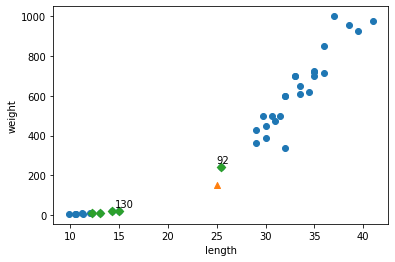

In [48]:
# 산점도로 확인
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D", label = distances)
plt.text(25, 260, 92, fontdict={'size': 10})
plt.text(14.5, 40, 130, fontdict={'size': 10})
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

가장 가까운 데이터 5개 중 4개가 빙어로 압도적으로 많음을 확인할 수 있다.

객관적으로 보았을 때와 다르다.

그리고 가장 가까운 2개의 데이터를 보면 거리가 92 와 130 으로 그래프 상에서 문제가 있는 것을 알 수 있다.

x축의 범위는 10 ~ 40 인데 반해, y축의 범위는 0 ~ 1000 으로 큰 차이가 나느 것을 알 수 있다. 

**이처럼 두 축 간의 범위가 다르기 때문에 동일하게 제곱하여 구한 거리의 값에서 문제가 발생하였다.**

따라서 x축 범위 또한 동일하게 지정할 필요가 있다.

xlim() 함수 사용

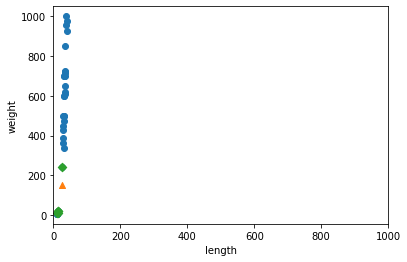

In [49]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = "^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = "D")
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

거의 모든 데이터가 일직선 상에 나타나는 것을 볼 수 있다.

결국 x축 데이터인 길이는 큰 영향을 주지 못하게 된다.

이런 상황을 두 특성의 **스케일**이 다르다고 한다.

이러한 상황에서 알고리즘이 올바르게 예측하기는 힘들다. 특히 거리 기반일 때 문제는 커지게 된다.

k-최근접 이웃도 거리 기반이기에 이에 포함된다.

이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므롤 특성값을 일정한 기준으로 맞춰 주어야 한다. 이런 작업을 **데이터 전처리 data preprocessing**라고 부른다.

## 데이터 전처리 방법

가장 널리 사용하는 방법 중 하나는 **표준점수 standard score**이다. 혹은 z 점수라고 한다.

이는 특성값의 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

In [51]:
# standard score 사용 전

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean)
print(std)

[ 27.29722222 454.09722222]
[  9.98244253 323.29893931]


In [52]:
train_scaled = (train_input - mean)/std

train_input 의 모든 행에서 mean 과 std 를 이용하여 값을 수정해준다.

이러한 numpy 의 기능을 **브로드캐스팅 broadcasting**이라고 한다.


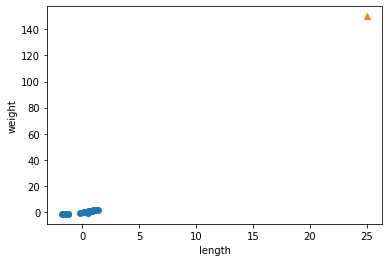

In [55]:
# 브로드캐스팅된 데이터로 산점도로 확인

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker = "^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

train_input 은 모두 브로드캐스팅을 통해 train_scaled 로 고쳤지만, 확인하고자 하는 [25, 150] 의 데이터는 수정해주지 않아서 원하는 데이터의 모양이 나오지 않았다.

이 데이터도 똑같이 수정후 그려본다.

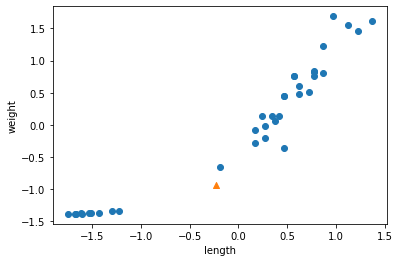

In [56]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = "^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

두 축의 범위가 -1.5 ~ +1.5 로 바뀌어 비슷한 범위를 차지하는 것을 볼 수 있다.

이제 수정된 데이터로 k-최근접 이웃 모델을 다시 훈련해보자

In [57]:
# train_scaled 로 다시 훈련

kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

1.0

In [58]:
print(kn.predict([new]))

[1.]


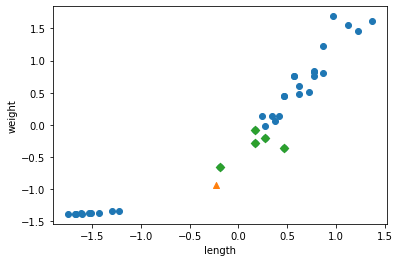

In [59]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = "^")
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = "D")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

가장 가까운 샘플은 모두 도미이다. 따라서 예측 값도 당연히 도미로 나오게 된다.

### 고찰

위의 train_scaled 로 다시 훈련 셀에서

```
test_scaled = (test_input - mean) / std
```
test_input 또한 브로드캐스팅을 해주는 것은 타당하다. 그렇지만 이 과정에서 사용하는 mean 과 std 는


```
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)
```

train_input 을 통해 얻은 값으로 훈련 세트가 크게 관여한다.

결국 train_set 과 test_set 으로 나누는 과정부터 훈련의 성과에 더 크게 영향을 줄 수도 있고, 당연히 테스트 세트가 아닌 실제 데이터에서도 영향을 크게 줄 것으로 보인다.

